In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from analysis import load_sim_states, load_toml, get_vehicle_arrival_and_exits, display_and_save_animation
from IPython.display import HTML

### Set-up config files and run with single seed

In [2]:
# Seed
SEED = 0

# File names for two crossings
config_file2 = "zebra_config_2crossings.toml"
outfile2 = "sim_states_2crossings.json"

# File names for three crossings
config_file3 = "zebra_config_3crossings.toml"
outfile3 = "sim_states_3crossings.json"

In [3]:
%%writefile $config_file2
road_length = 600
zebra_crossings = [180, 440]
pelican_crossings = []
max_acceleration = 4.0
max_deceleration = 3.0
crossing_time = 8000
pelican_wait_time = 5000
pelican_go_time = 5000
max_speed = 13.41

[simulation]
run_time = 1800_000
num_pedestrians = 500
num_vehicles = 500
vehicle_arrival_rate = 0.2
pedestrian_arrival_rate = 0.1

Overwriting zebra_config_2crossings.toml


In [4]:
%%writefile $config_file3
road_length = 600
zebra_crossings = [180, 300, 440]
pelican_crossings = []
max_acceleration = 4.0
max_deceleration = 3.0
crossing_time = 8000
pelican_wait_time = 5000
pelican_go_time = 5000
max_speed = 13.41

[simulation]
run_time = 1800_000
num_pedestrians = 500
num_vehicles = 500
vehicle_arrival_rate = 0.2
pedestrian_arrival_rate = 0.1

Overwriting zebra_config_3crossings.toml


In [5]:
%%capture
# Run the simulations
!cargo run -- --config_file $config_file2 --outfile $outfile2 --seed $SEED
!cargo run -- --config_file $config_file3 --outfile $outfile3 --seed $SEED

In [6]:
# Load zebra toml and outfiles
zebra_toml2 = load_toml(config_file2)
states2 = load_sim_states(outfile2)
zebra_toml3 = load_toml(config_file3)
states3 = load_sim_states(outfile3)

In [7]:
# Get dataframes for two and three crossing versions
df2 = get_vehicle_arrival_and_exits(states2)
df3 = get_vehicle_arrival_and_exits(states3)

> Mean transit times:
Two crossings:   54.603s
Three crossings: 53.757s
> Median transit times:
Two crossings:   53.113s
Three crossings: 52.356s


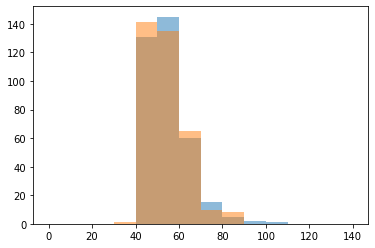

In [8]:
# Plot hists, compare means and medians
bins = np.arange(0, 150, 10)
alpha = 0.5
plt.hist(df2["transit"], bins=bins, alpha=alpha)
plt.hist(df3["transit"], bins=bins, alpha=alpha)
mean2, median2 = df2["transit"].mean(), df2["transit"].median()
mean3, median3 = df3["transit"].mean(), df3["transit"].median()
print(f"> Mean transit times:")
print(f"Two crossings:   {mean2:.3f}s")
print(f"Three crossings: {mean3:.3f}s")
print(f"> Median transit times:")
print(f"Two crossings:   {median2:.3f}s")
print(f"Three crossings: {median3:.3f}s")

In [9]:
# Display and save animation
html = display_and_save_animation(states3, zebra_toml3, "test.gif", frame_limit=10000, write=False)

display(HTML(html))
plt.close()

### Set-up and get averages across multiple runs

In [ ]:
# TODO